In [1]:
#tensorboard via command-line:
#tensorboard --logdir=where your Logs directory is

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
#What is the maximum flare class produced by an AR in the next 24hrs after a 24hr time sequence?
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
#feature data from - hmi.sharp_720s:::
#http://jsoc.stanford.edu/doc/data/hmi/sharp/sharp.htm

#label data from - GOES flare events:::
#ftp://ftp.swpc.noaa.gov/pub/warehouse/

#and from - GOES XRS Report:::
#https://www.ngdc.noaa.gov/stp/space-weather/solar-data/solar-features/solar-flares/x-rays/goes/xrs/
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
#binary class - F for flare and N for no flare
#multi-class - #6 flare classes: N is no flare, A is smallest, X is largest
               #key = {'N', 'A', 'B', 'C', 'M', 'X'}
               #['A' class flares generally not listed in official reports due to small size]
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

In [3]:
import tensorflow as tf
print("tensorflow version:", tf.__version__) #2.3.1 used
from tensorflow import keras
import os
import glob
import shutil
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from astropy.time import Time
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dropout, Dense, Embedding, Flatten, SimpleRNN, LSTM, GRU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD, Adam
import drms #https://pypi.org/project/drms/

tensorflow version: 2.3.1


In [4]:
import Flare_Data

In [5]:
################creates/loads csv with 2012's feature data##########
current_di = os.getcwd()
csv_for_2012 = "\\create_2012_features.csv"
where_2012 = current_di + csv_for_2012

if not os.path.exists(where_2012):
    import to_create_2012
    to_create_2012.get_2012_Features()
    df_2012 = pd.read_csv('create_2012_features.csv', index_col=0)
    df_2012_done = Flare_Data.convert_time_2012(df_2012)
    Flare_Data.save_some_features(df_2012_done) 

if os.path.exists(where_2012):
    df_2012 = pd.read_csv('create_2012_features.csv', index_col=0)
    df_2012_done = Flare_Data.convert_time_2012(df_2012)
    Flare_Data.save_some_features(df_2012_done)
####################################################################

In [6]:
################creates/loads csv with 2013's feature data##########
current_di = os.getcwd()
csv_for_2013 = "\\create_2013_features.csv"
where_2013 = current_di + csv_for_2013

if not os.path.exists(where_2013):
    import to_create_2013
    to_create_2013.get_2013_Features()
    df_2013 = pd.read_csv('create_2013_features.csv', index_col=0)
    df_2013_done = Flare_Data.convert_time_2013(df_2013)
    Flare_Data.save_some_features(df_2013_done) 

if os.path.exists(where_2013):
    df_2013 = pd.read_csv('create_2013_features.csv', index_col=0)
    df_2013_done = Flare_Data.convert_time_2013(df_2013)
    Flare_Data.save_some_features(df_2013_done)
####################################################################

In [7]:
################creates/loads csv with 2014's feature data##########
current_di = os.getcwd()
csv_for_2014 = "\\create_2014_features.csv"
where_2014 = current_di + csv_for_2014

if not os.path.exists(where_2014):
    import to_create_2014
    to_create_2014.get_2014_Features()
    df_2014 = pd.read_csv('create_2014_features.csv', index_col=0)
    df_2014_done = Flare_Data.convert_time_2014(df_2014)
    Flare_Data.save_some_features(df_2014_done) 

if os.path.exists(where_2014):
    df_2014 = pd.read_csv('create_2014_features.csv', index_col=0)
    df_2014_done = Flare_Data.convert_time_2014(df_2014)
    Flare_Data.save_some_features(df_2014_done)
####################################################################

In [8]:
################creates/loads csv with 2015's feature data##########
current_di = os.getcwd()
csv_for_2015 = "\\create_2015_features.csv"
where_2015 = current_di + csv_for_2015

if not os.path.exists(where_2015):
    import to_create_2015
    to_create_2015.get_2015_Features()
    df_2015 = pd.read_csv('create_2015_features.csv', index_col=0)
    df_2015_done = Flare_Data.convert_time_2015(df_2015)
    Flare_Data.save_some_features(df_2015_done) 

if os.path.exists(where_2015):
    df_2015 = pd.read_csv('create_2015_features.csv', index_col=0)
    df_2015_done = Flare_Data.convert_time_2015(df_2015)
    Flare_Data.save_some_features(df_2015_done)
####################################################################

In [9]:
#removes old tensorboard Logs and recreates or creates Logs folder
current_dir = os.getcwd()
l_folder = "\\Logs"
where_logs = current_dir + l_folder

if not os.path.exists(where_logs):
    os.mkdir(where_logs)
    
if os.path.exists(where_logs):
    shutil.rmtree(where_logs)
    os.mkdir(where_logs)

In [10]:
#binary = True for binary classification, binary = False for multi-class classification
X_train, X_val, X_test, y_train, y_val, y_test, tim_steps, n_feats, count_of_classes, a_encoder = Flare_Data.getAllData(binary = False)

The time series starts from:  2012-01-01 00:11:26
The time series ends on:  2015-12-31 23:47:24
(array(['B', 'C', 'M', 'N', 'X'], dtype='<U1'), array([ 73, 436, 128, 766,  16], dtype=int64))


In [11]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(794, 114, 20) (341, 114, 20) (284, 114, 20) (794, 5) (341, 5) (284, 5)


In [12]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

In [13]:
test_batch_size = 1
batch_size = 114
epochs = 100

In [14]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~[LSTM2 Model]~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~[Multi-Class]~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~[Multiple Layers]~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(tim_steps, n_feats)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(count_of_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 114, 50)           14200     
_________________________________________________________________
dropout (Dropout)            (None, 114, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 505       
Total params: 75,105
Trainable params: 75,105
Non-trainable params: 0
_________________________________________________________________


In [16]:
tensorboard_call = keras.callbacks.TensorBoard(log_dir=where_logs, histogram_freq=1)

In [17]:
history = model.fit(X_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_data=(X_val, y_val), 
                    verbose=1, 
                    callbacks=[tensorboard_call])

Epoch 1/100
  1/159 [..............................] - ETA: 0s - loss: 1.6168 - categorical_accuracy: 0.4000WARNING:tensorflow:From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
159/159 [==============================] - 14s 86ms/step - loss: 1.1622 - categorical_accuracy: 0.5214 - val_loss: 1.1168 - val_categorical_accuracy: 0.5396
Epoch 2/100
159/159 [==============================] - 12s 74ms/step - loss: 1.1367 - categorical_accuracy: 0.5214 - val_loss: 1.1189 - val_categorical_accuracy: 0.5396
Epoch 3/100
159/159 [==============================] - 12s 76ms/step - loss: 1.1245 - categorical_accuracy: 0.5353 - val_loss: 1.1140 - val_categorical_accuracy: 0.5396
Epoch 4/100
159/159 [==============================] - 12s 76ms/step - loss: 1.1266 - categorical_accuracy: 0.5340 

159/159 [==============================] - 13s 79ms/step - loss: 0.6872 - categorical_accuracy: 0.7242 - val_loss: 1.3318 - val_categorical_accuracy: 0.5044
Epoch 46/100
159/159 [==============================] - 12s 77ms/step - loss: 0.6351 - categorical_accuracy: 0.7443 - val_loss: 1.4116 - val_categorical_accuracy: 0.5161
Epoch 47/100
159/159 [==============================] - 12s 77ms/step - loss: 0.6332 - categorical_accuracy: 0.7393 - val_loss: 1.4791 - val_categorical_accuracy: 0.4692
Epoch 48/100
159/159 [==============================] - 12s 78ms/step - loss: 0.5793 - categorical_accuracy: 0.7645 - val_loss: 1.6674 - val_categorical_accuracy: 0.5103
Epoch 49/100
159/159 [==============================] - 12s 77ms/step - loss: 0.5539 - categorical_accuracy: 0.7783 - val_loss: 1.5921 - val_categorical_accuracy: 0.5044
Epoch 50/100
159/159 [==============================] - 12s 77ms/step - loss: 0.5169 - categorical_accuracy: 0.7997 - val_loss: 1.6912 - val_categorical_accuracy: 

159/159 [==============================] - 13s 79ms/step - loss: 0.1932 - categorical_accuracy: 0.9446 - val_loss: 3.1227 - val_categorical_accuracy: 0.4751
Epoch 94/100
159/159 [==============================] - 13s 84ms/step - loss: 0.3339 - categorical_accuracy: 0.9030 - val_loss: 2.7225 - val_categorical_accuracy: 0.4370
Epoch 95/100
159/159 [==============================] - 13s 84ms/step - loss: 0.0891 - categorical_accuracy: 0.9673 - val_loss: 2.9218 - val_categorical_accuracy: 0.4604
Epoch 96/100
159/159 [==============================] - 12s 78ms/step - loss: 0.0703 - categorical_accuracy: 0.9786 - val_loss: 3.0483 - val_categorical_accuracy: 0.4399
Epoch 97/100
159/159 [==============================] - 12s 78ms/step - loss: 0.0322 - categorical_accuracy: 0.9937 - val_loss: 3.1991 - val_categorical_accuracy: 0.4428
Epoch 98/100
159/159 [==============================] - 13s 79ms/step - loss: 0.0249 - categorical_accuracy: 0.9950 - val_loss: 3.2795 - val_categorical_accuracy: 

In [18]:
#evaluate model on test set
results = model.evaluate(X_test, y_test, batch_size=test_batch_size, verbose=1)
print("test loss, test acc:", results)

57/57 [==============================] - 1s 14ms/step - loss: 3.0255 - categorical_accuracy: 0.4859
test loss, test acc: [3.0254523754119873, 0.48591548204421997]


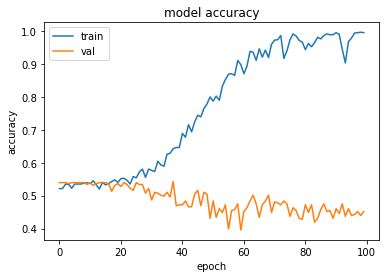

In [19]:
#summarize history for accuracy
plt.plot(history.history[(list(history.history.keys())[1])])
plt.plot(history.history[(list(history.history.keys())[3])])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

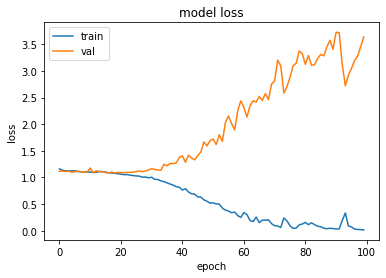

In [20]:
#summarize history for loss
plt.plot(history.history[(list(history.history.keys())[0])])
plt.plot(history.history[(list(history.history.keys())[2])])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:
#generate predictions
predictions = model.predict(X_test)
print("predictions:", predictions)

predictions: [[5.9839604e-05 7.2200261e-02 8.1416554e-05 9.2758155e-01 7.6936609e-05]
 [4.0830860e-06 5.0941278e-04 9.4608106e-03 9.8928660e-01 7.3905109e-04]
 [5.6127665e-06 6.3630672e-05 1.3159935e-06 9.9990332e-01 2.6121175e-05]
 ...
 [2.3083085e-06 1.3256986e-05 2.5993904e-08 9.9998355e-01 7.7957327e-07]
 [2.8046542e-03 9.8927081e-01 5.4494094e-04 9.5525436e-05 7.2840634e-03]
 [4.9174286e-04 6.3631587e-02 1.8310739e-05 9.3583280e-01 2.5602620e-05]]


In [22]:
#remove encoding
real_predictions_B = a_encoder.inverse_transform(predictions)
print(real_predictions_B)

['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'C' 'C' 'C' 'N' 'M' 'N' 'N' 'C' 'N'
 'C' 'N' 'N' 'C' 'N' 'C' 'C' 'C' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'C' 'N' 'N' 'N' 'C' 'B' 'C' 'C' 'N' 'C' 'C' 'N' 'N' 'N' 'N' 'C' 'C' 'M'
 'N' 'N' 'C' 'M' 'C' 'C' 'N' 'N' 'C' 'C' 'M' 'N' 'N' 'N' 'C' 'C' 'C' 'N'
 'N' 'C' 'N' 'N' 'N' 'B' 'M' 'N' 'C' 'N' 'C' 'N' 'N' 'N' 'C' 'N' 'C' 'C'
 'N' 'B' 'N' 'N' 'C' 'N' 'C' 'N' 'M' 'N' 'N' 'N' 'N' 'C' 'N' 'C' 'N' 'N'
 'N' 'N' 'B' 'N' 'N' 'N' 'N' 'C' 'C' 'C' 'C' 'C' 'M' 'N' 'C' 'N' 'N' 'C'
 'N' 'N' 'M' 'N' 'N' 'M' 'C' 'C' 'M' 'N' 'N' 'C' 'C' 'B' 'N' 'C' 'N' 'N'
 'N' 'N' 'N' 'B' 'N' 'N' 'N' 'N' 'N' 'N' 'C' 'C' 'C' 'N' 'N' 'N' 'N' 'C'
 'N' 'N' 'N' 'C' 'N' 'C' 'N' 'N' 'M' 'N' 'B' 'N' 'C' 'N' 'N' 'C' 'N' 'N'
 'C' 'N' 'N' 'N' 'N' 'C' 'M' 'M' 'C' 'N' 'N' 'C' 'N' 'N' 'N' 'B' 'N' 'N'
 'C' 'N' 'N' 'M' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'C' 'N' 'N' 'N' 'C' 'N'
 'C' 'C' 'C' 'N' 'C' 'N' 'C' 'N' 'N' 'N' 'C' 'N' 'N' 'N' 'C' 'C' 'X' 'N'
 'N' 'N' 'N' 'N' 'M' 'N' 'N' 'N' 'N' 'N' 'N' 'M' 'N

In [23]:
#prediction counts
unique, counts = np.unique(real_predictions_B, return_counts=True)
dict(zip(unique, counts))

{'B': 9, 'C': 84, 'M': 18, 'N': 172, 'X': 1}

In [24]:
#y_test predictions
ytest_predictions = a_encoder.inverse_transform(y_test)
print(ytest_predictions)

['C' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'B' 'N' 'N' 'C' 'C' 'M' 'C' 'C' 'N' 'N'
 'X' 'C' 'N' 'N' 'N' 'M' 'N' 'M' 'M' 'C' 'N' 'N' 'N' 'M' 'N' 'C' 'N' 'N'
 'C' 'C' 'C' 'M' 'C' 'N' 'N' 'C' 'N' 'N' 'N' 'N' 'X' 'N' 'N' 'M' 'N' 'M'
 'C' 'C' 'C' 'M' 'N' 'C' 'N' 'C' 'N' 'N' 'N' 'C' 'C' 'N' 'M' 'C' 'M' 'C'
 'N' 'C' 'M' 'N' 'N' 'C' 'N' 'N' 'N' 'C' 'C' 'N' 'N' 'N' 'B' 'N' 'N' 'N'
 'N' 'N' 'C' 'N' 'C' 'N' 'M' 'N' 'N' 'C' 'N' 'N' 'N' 'C' 'M' 'B' 'B' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'C' 'N' 'N' 'C' 'N' 'N' 'M' 'N' 'B' 'N' 'C' 'C'
 'N' 'N' 'C' 'N' 'N' 'C' 'C' 'N' 'N' 'N' 'N' 'M' 'N' 'C' 'C' 'N' 'C' 'C'
 'C' 'N' 'C' 'C' 'N' 'N' 'N' 'C' 'N' 'M' 'N' 'N' 'M' 'N' 'B' 'C' 'N' 'C'
 'N' 'N' 'C' 'N' 'C' 'M' 'N' 'N' 'N' 'N' 'N' 'B' 'N' 'N' 'N' 'C' 'C' 'B'
 'B' 'C' 'N' 'N' 'N' 'N' 'M' 'N' 'N' 'N' 'N' 'C' 'N' 'N' 'N' 'C' 'N' 'C'
 'N' 'C' 'N' 'N' 'C' 'C' 'C' 'N' 'M' 'N' 'N' 'X' 'M' 'N' 'N' 'N' 'C' 'N'
 'C' 'M' 'N' 'M' 'C' 'N' 'C' 'C' 'N' 'N' 'N' 'N' 'C' 'C' 'C' 'C' 'C' 'N'
 'C' 'N' 'C' 'C' 'C' 'M' 'N' 'C' 'B' 'N' 'N' 'C' 'C

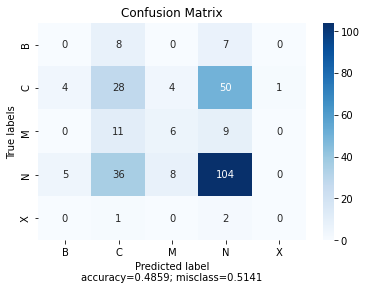

In [36]:
#confusion matrix
matrix = confusion_matrix(ytest_predictions, real_predictions_B)
#format confusion matrix
ax=plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax, cmap='Blues', fmt='g');
accuracy = np.trace(matrix) / np.sum(matrix).astype('float')
misclass = 1 - accuracy
ax.set_xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass));
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(unique); ax.yaxis.set_ticklabels(unique);